In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import miceforest as mf
import sklearn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [2]:
df=pd.read_csv(r'C:\Users\KIRAN JEEVA\Desktop\data science assesments\Captstone\Data-Science-Capstone-Projects-master\health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.loc[:,'Glucose':'Age']=df.loc[:,'Glucose':'Age'].replace(0,np.nan)

In [7]:
df.isnull().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

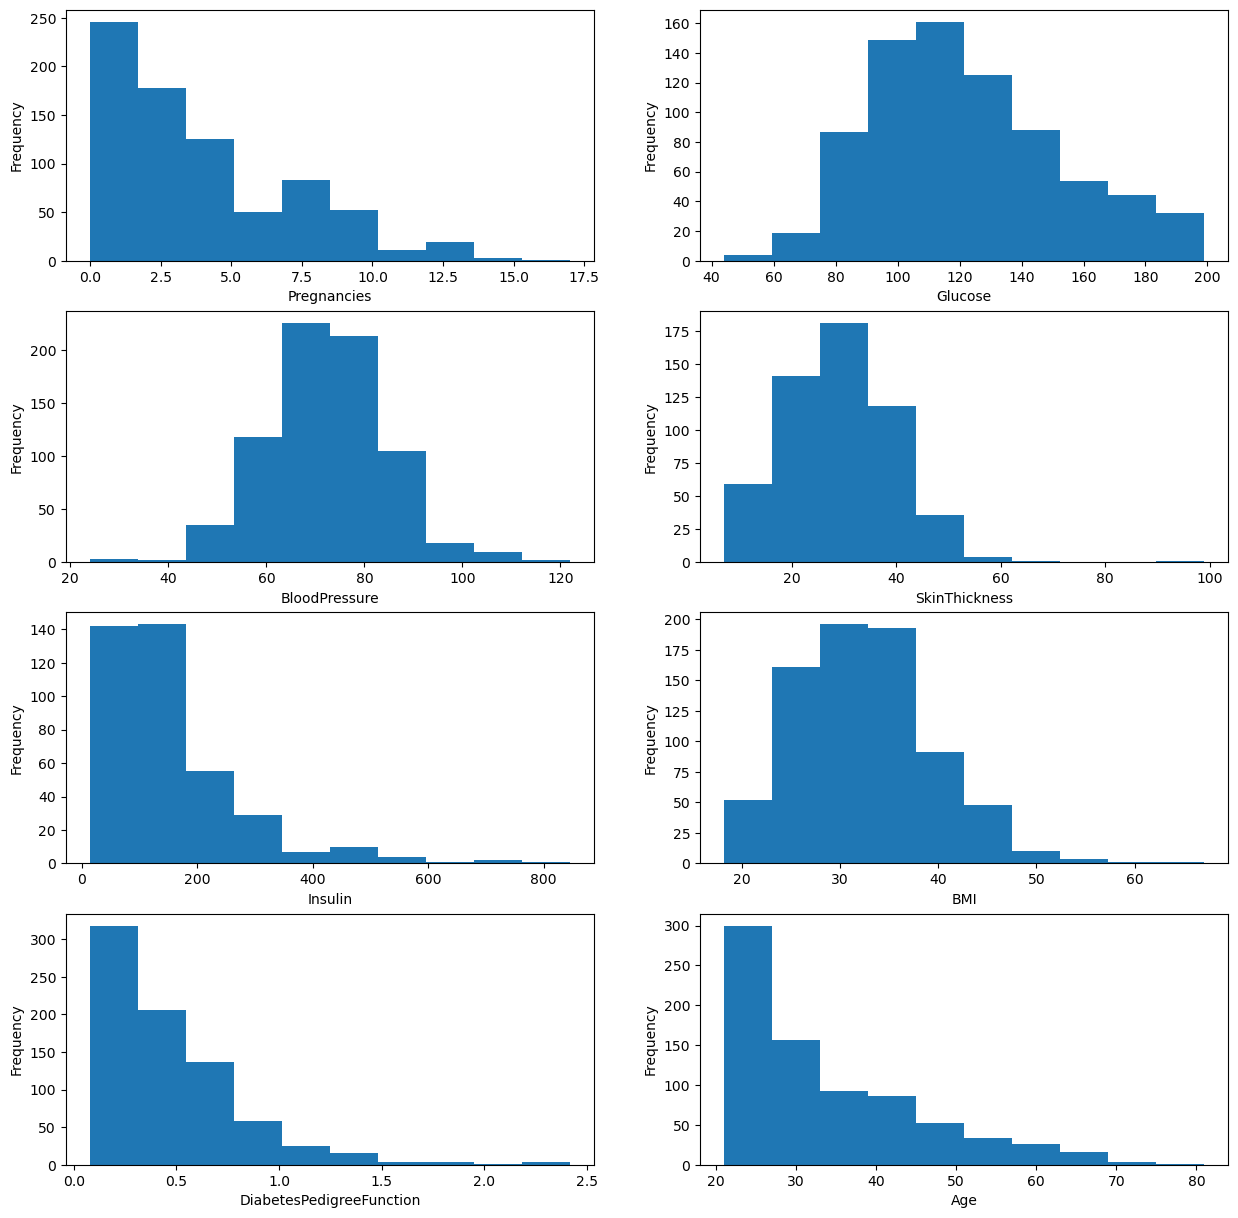

In [10]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for i,j in zip(df.columns[:-1],ax.ravel()):
    j.hist(df[i],histtype='bar')
    j.set_xlabel(i)
    j.set_ylabel('Frequency')

In [15]:
lr=LinearRegression()
impute=IterativeImputer(estimator=lr,missing_values=np.nan,max_iter=10,verbose=2,imputation_order='random',random_state=0)
ImputedData=impute.fit_transform(df)

[IterativeImputer] Completing matrix with shape (768, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.08
[IterativeImputer] Change: 194.62544029198455, scaled tolerance: 0.846 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.10
[IterativeImputer] Change: 7.709187699037955, scaled tolerance: 0.846 
[IterativeImputer] Ending imputation round 3/10, elapsed time 2.12
[IterativeImputer] Change: 5.7917870333059795, scaled tolerance: 0.846 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.13
[IterativeImputer] Change: 2.3179818096396616, scaled tolerance: 0.846 
[IterativeImputer] Ending imputation round 5/10, elapsed time 2.15
[IterativeImputer] Change: 0.9241978128959545, scaled tolerance: 0.846 
[IterativeImputer] Ending imputation round 6/10, elapsed time 2.17
[IterativeImputer] Change: 0.7816126899246996, scaled tolerance: 0.846 
[IterativeImputer] Early stopping criterion reached.


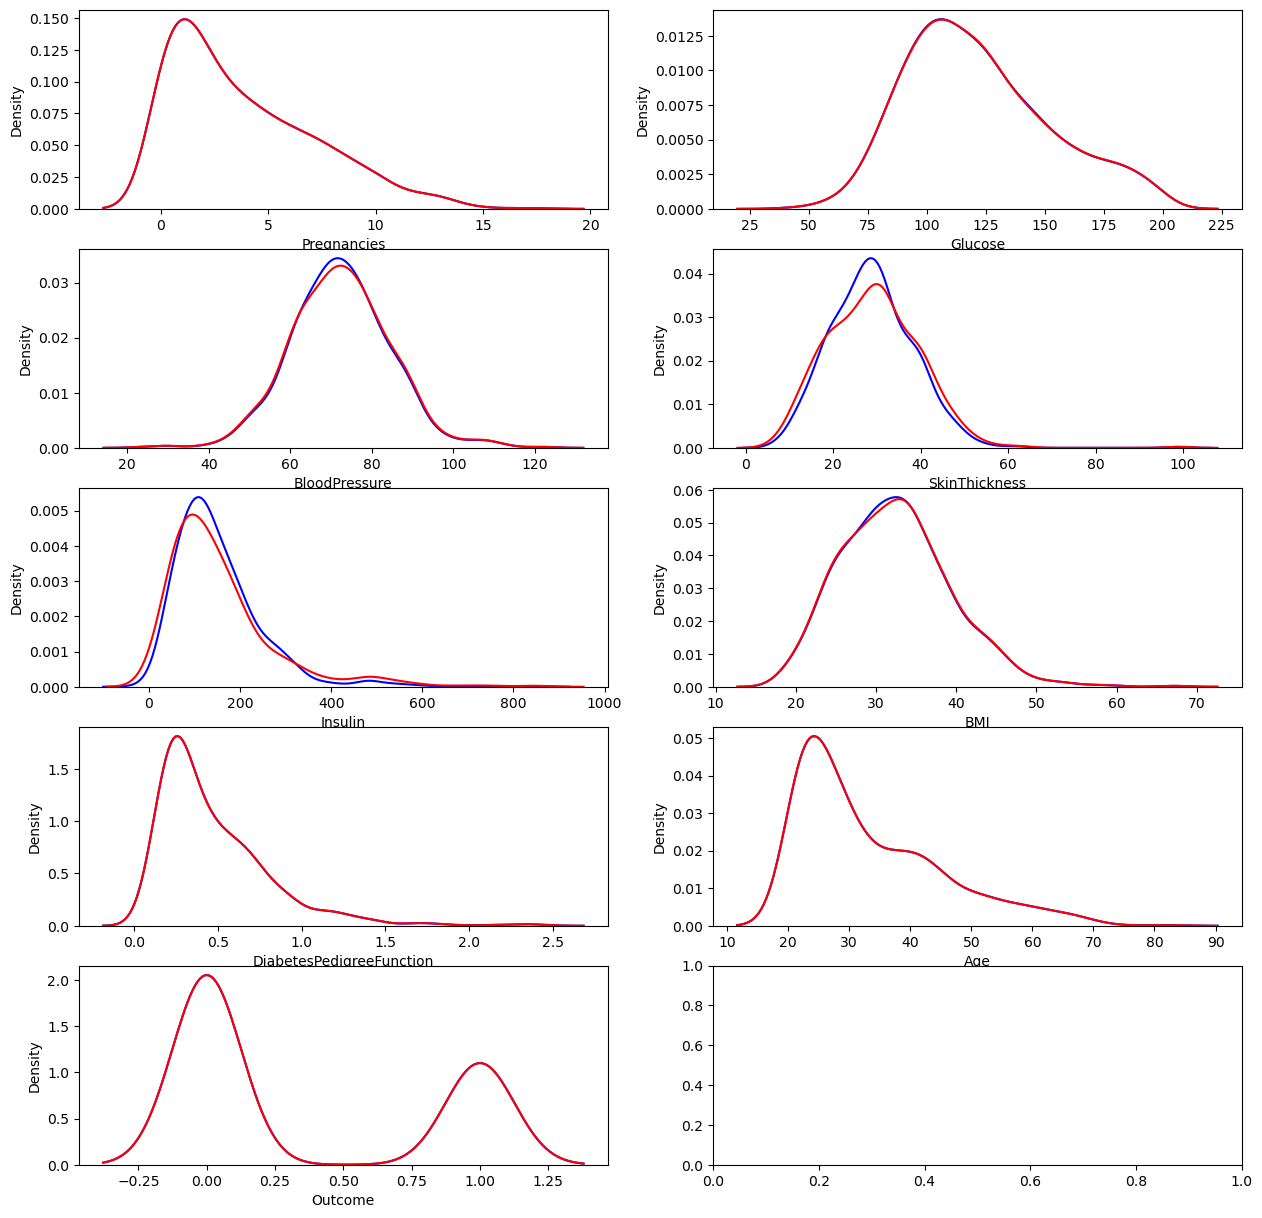

In [16]:
fig,ax=plt.subplots(5,2,figsize=(15,15))
for k,(i,j) in enumerate(zip(df.columns,ax.ravel())):
    
    sns.kdeplot(ImputedData[:,k],ax=j,color='b',)
    sns.kdeplot(df[i],ax=j,color='r')

In [17]:
kds=mf.ImputationKernel(df,datasets=10,save_all_iterations=True,random_state=10)
kds.mice(15)
ImputedData2=pd.concat([kds.complete_data(i) for i in range(10)]).groupby(level=0).mean()

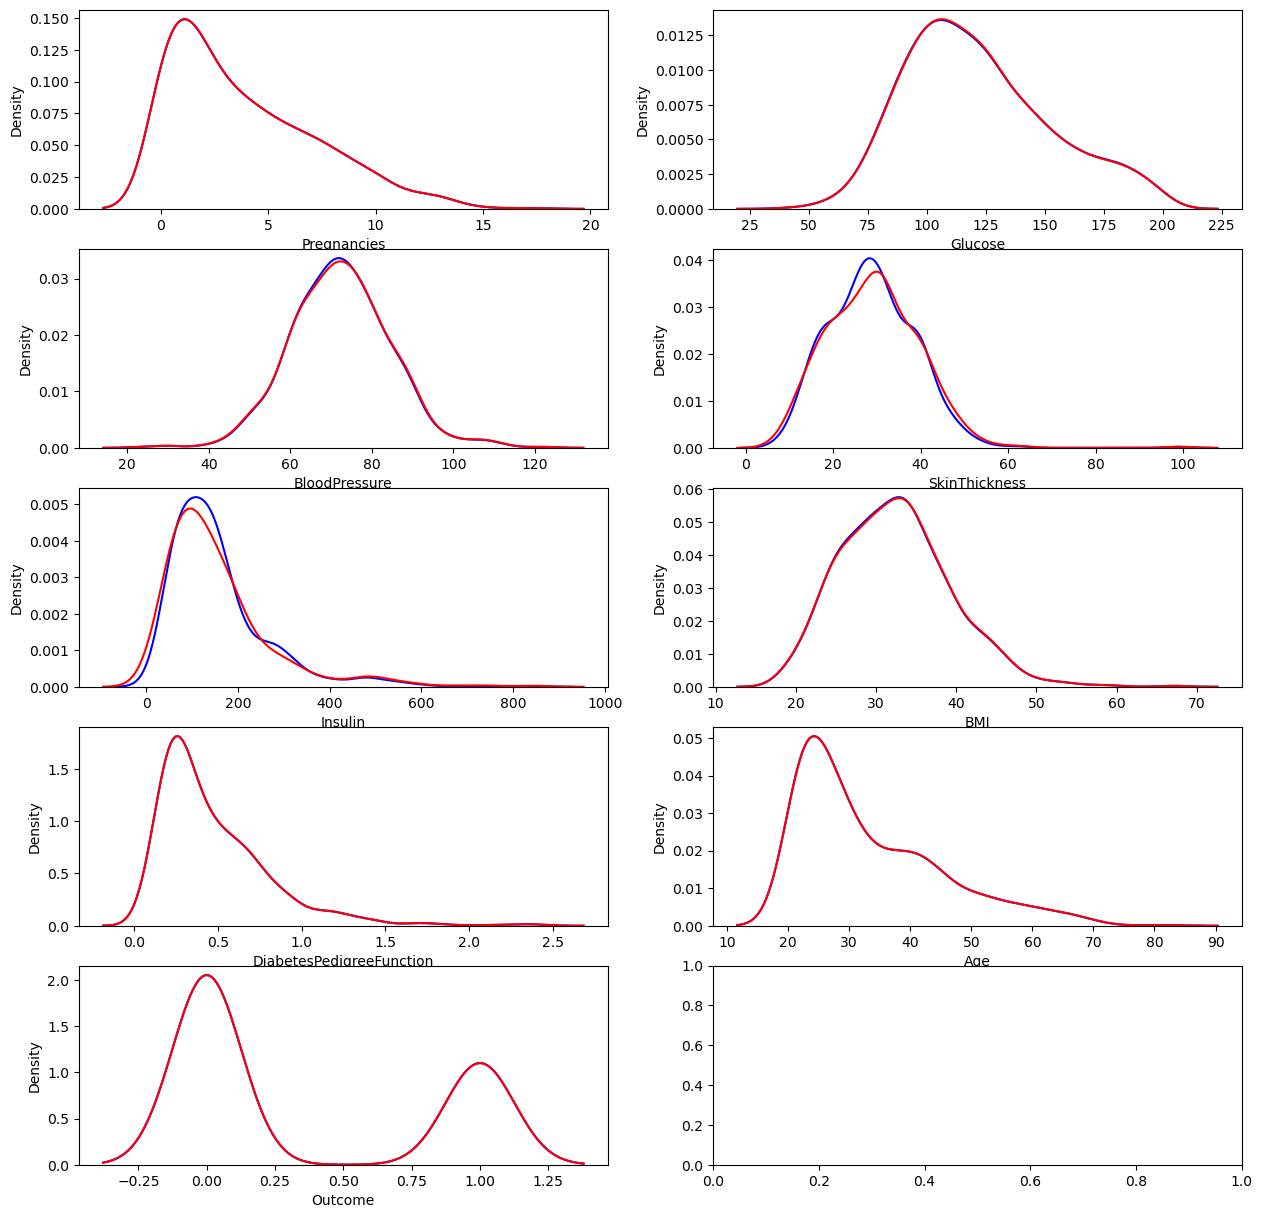

In [18]:
fig,ax=plt.subplots(5,2,figsize=(15,15))
for k,(i,j) in enumerate(zip(df.columns,ax.ravel())):
    
    sns.kdeplot(ImputedData2.loc[:,i],ax=j,color='b')
    sns.kdeplot(df[i],ax=j,color='r')

In [19]:
df_imp=ImputedData2

In [20]:
df_imp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,173.4,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,48.1,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.4,261.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


<AxesSubplot:ylabel='count'>

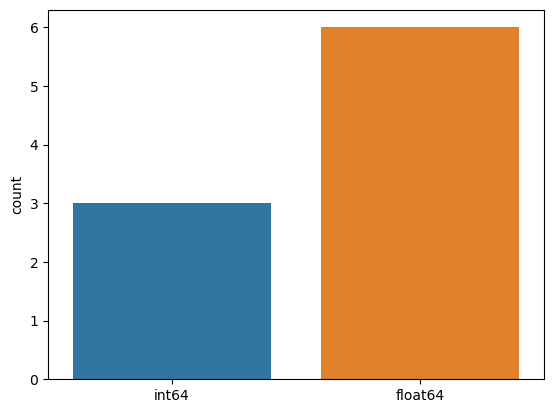

In [21]:
sns.countplot(x=df.dtypes)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

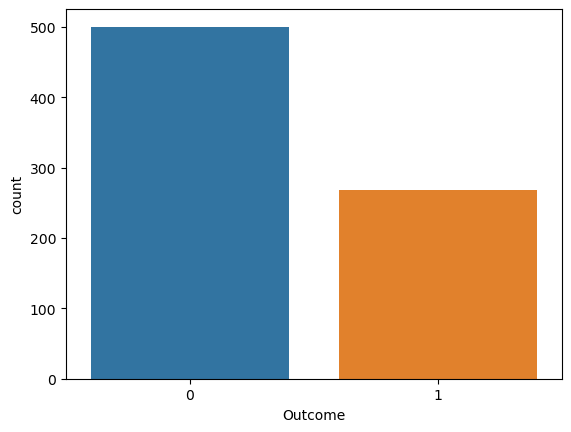

In [22]:
sns.countplot(x=df['Outcome'])

Imbalanced Data Handling

1. oversampling using smote,adasyn
2. using ensemble approach
3. increasing recall to reduce false negatives as false positive are a minor problem


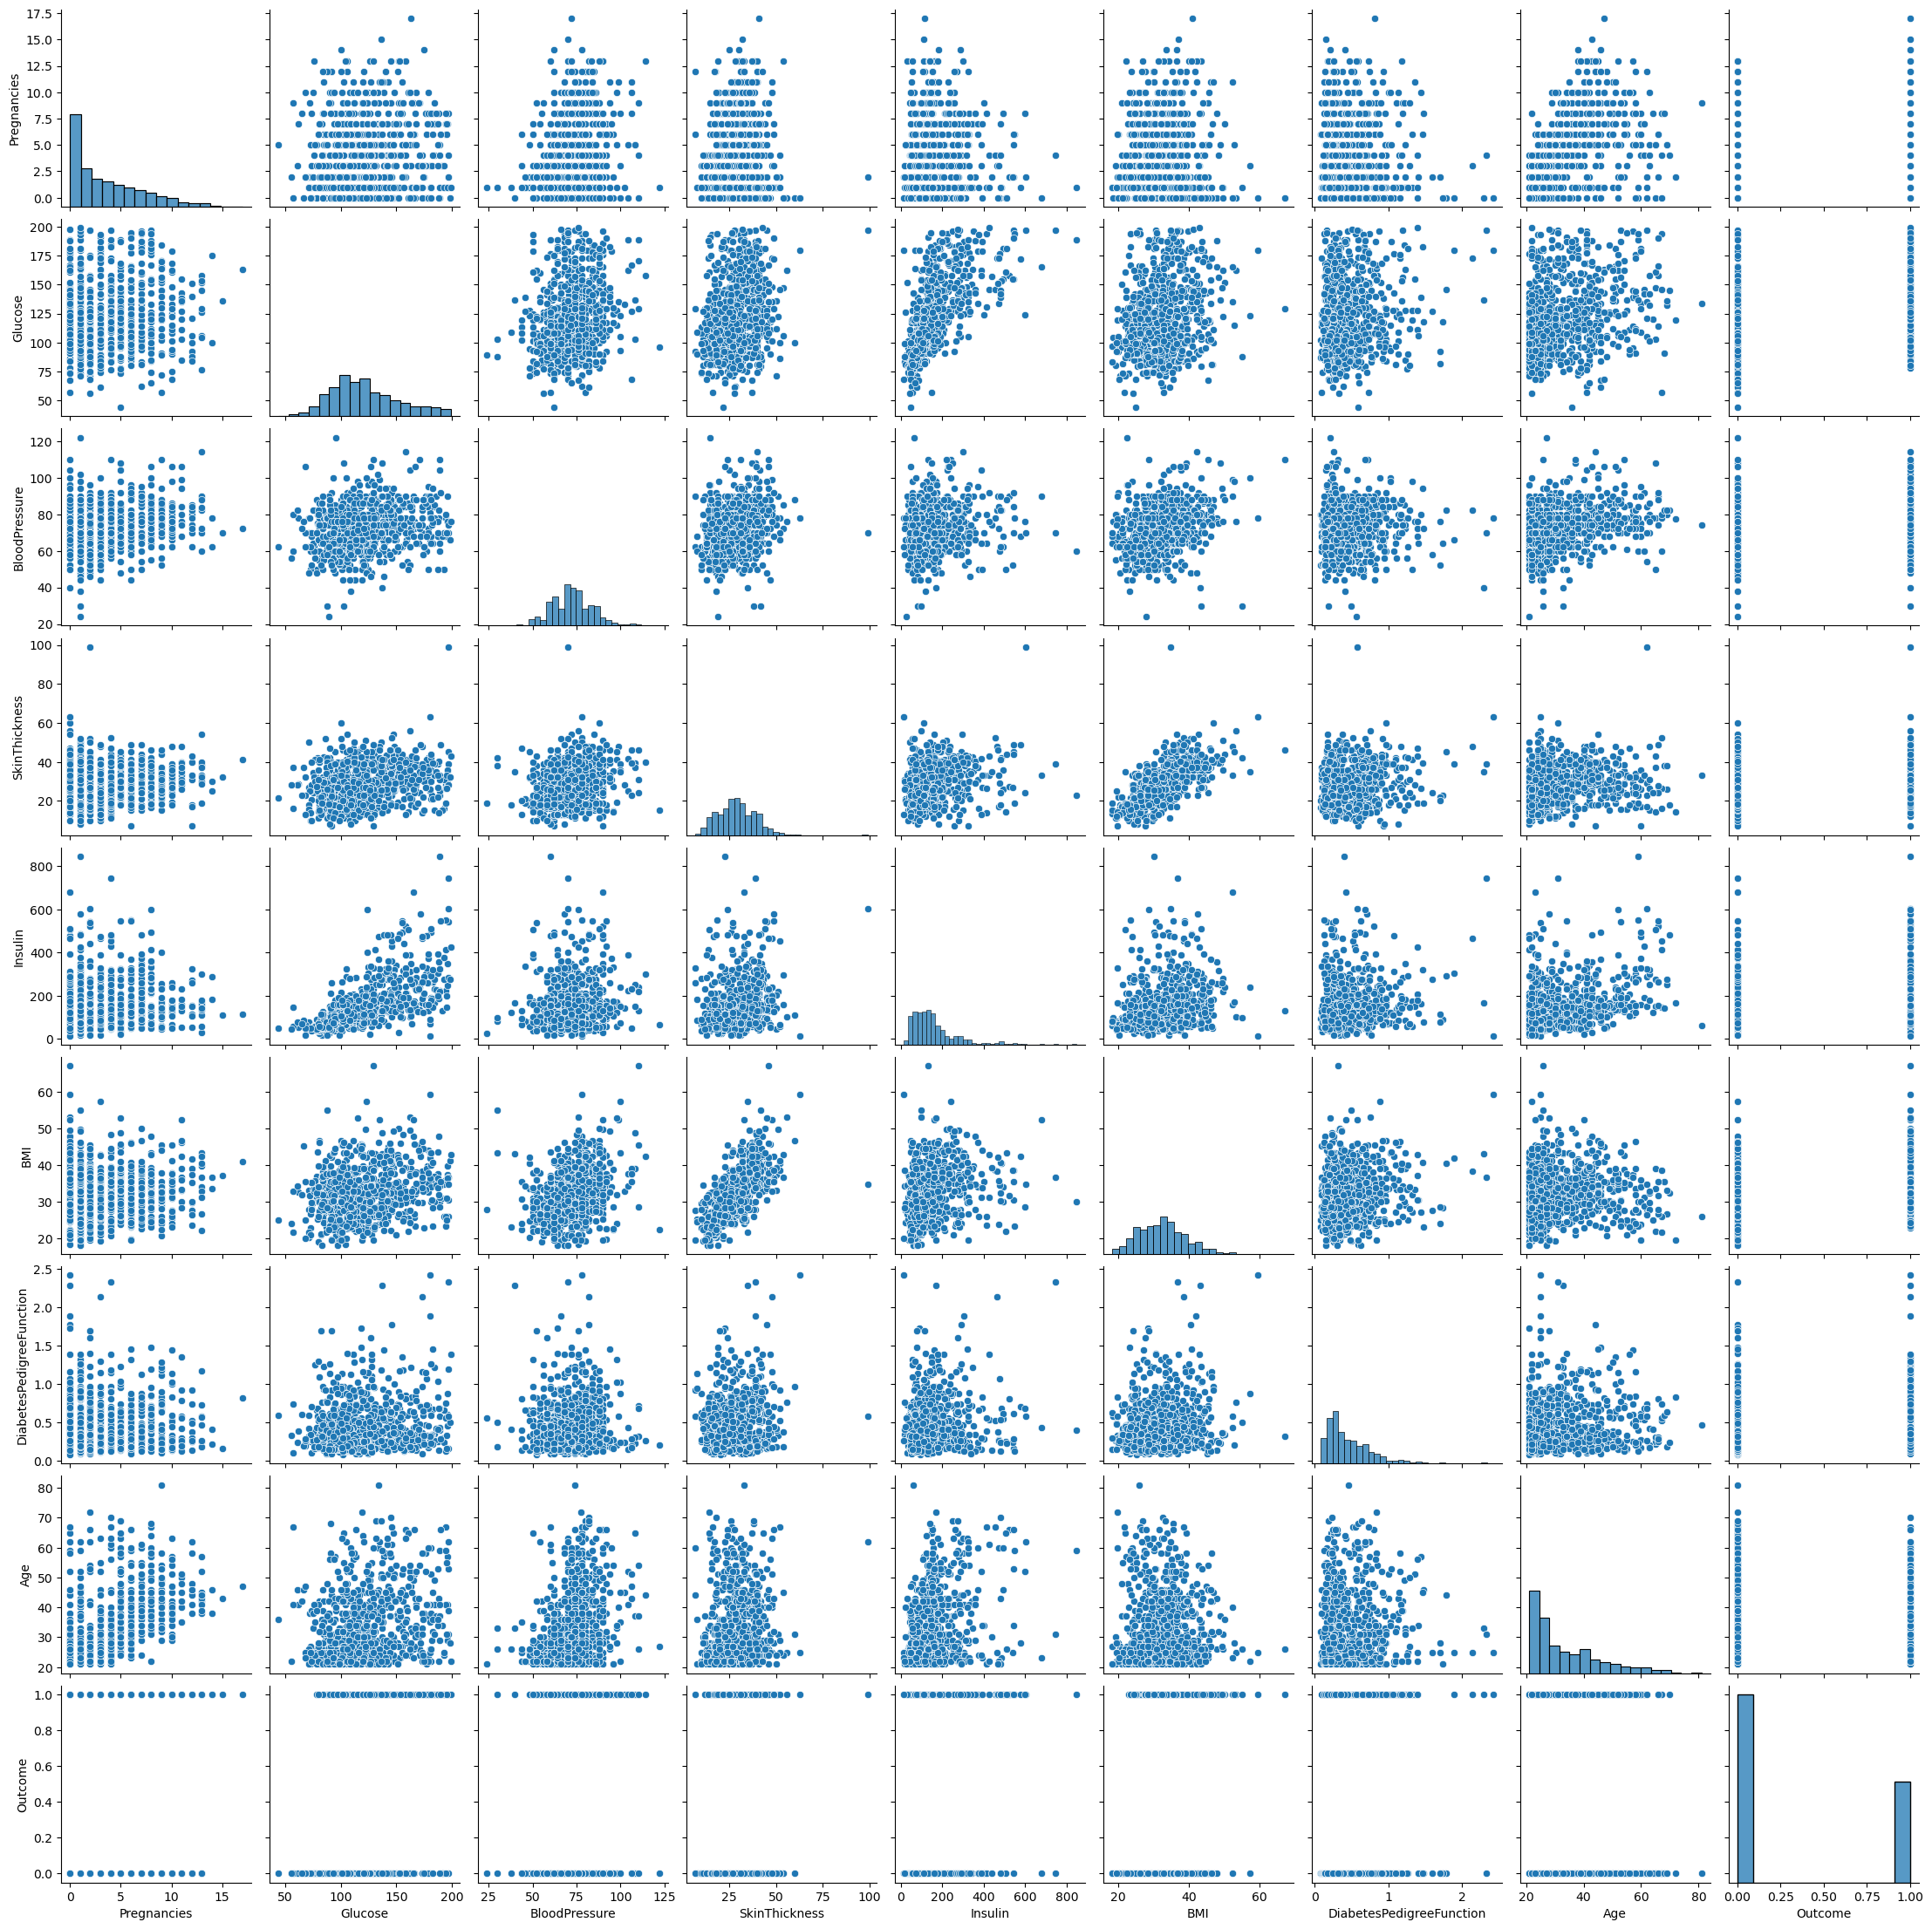

In [23]:
sns.pairplot(df_imp)

In [24]:
corr_matrix=df_imp.corr()

In [25]:
df_imp.corrwith(df_imp['Outcome'])

Pregnancies                 0.221898
Glucose                     0.498216
BloodPressure               0.181205
SkinThickness               0.272308
Insulin                     0.364071
BMI                         0.317150
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

<AxesSubplot:>

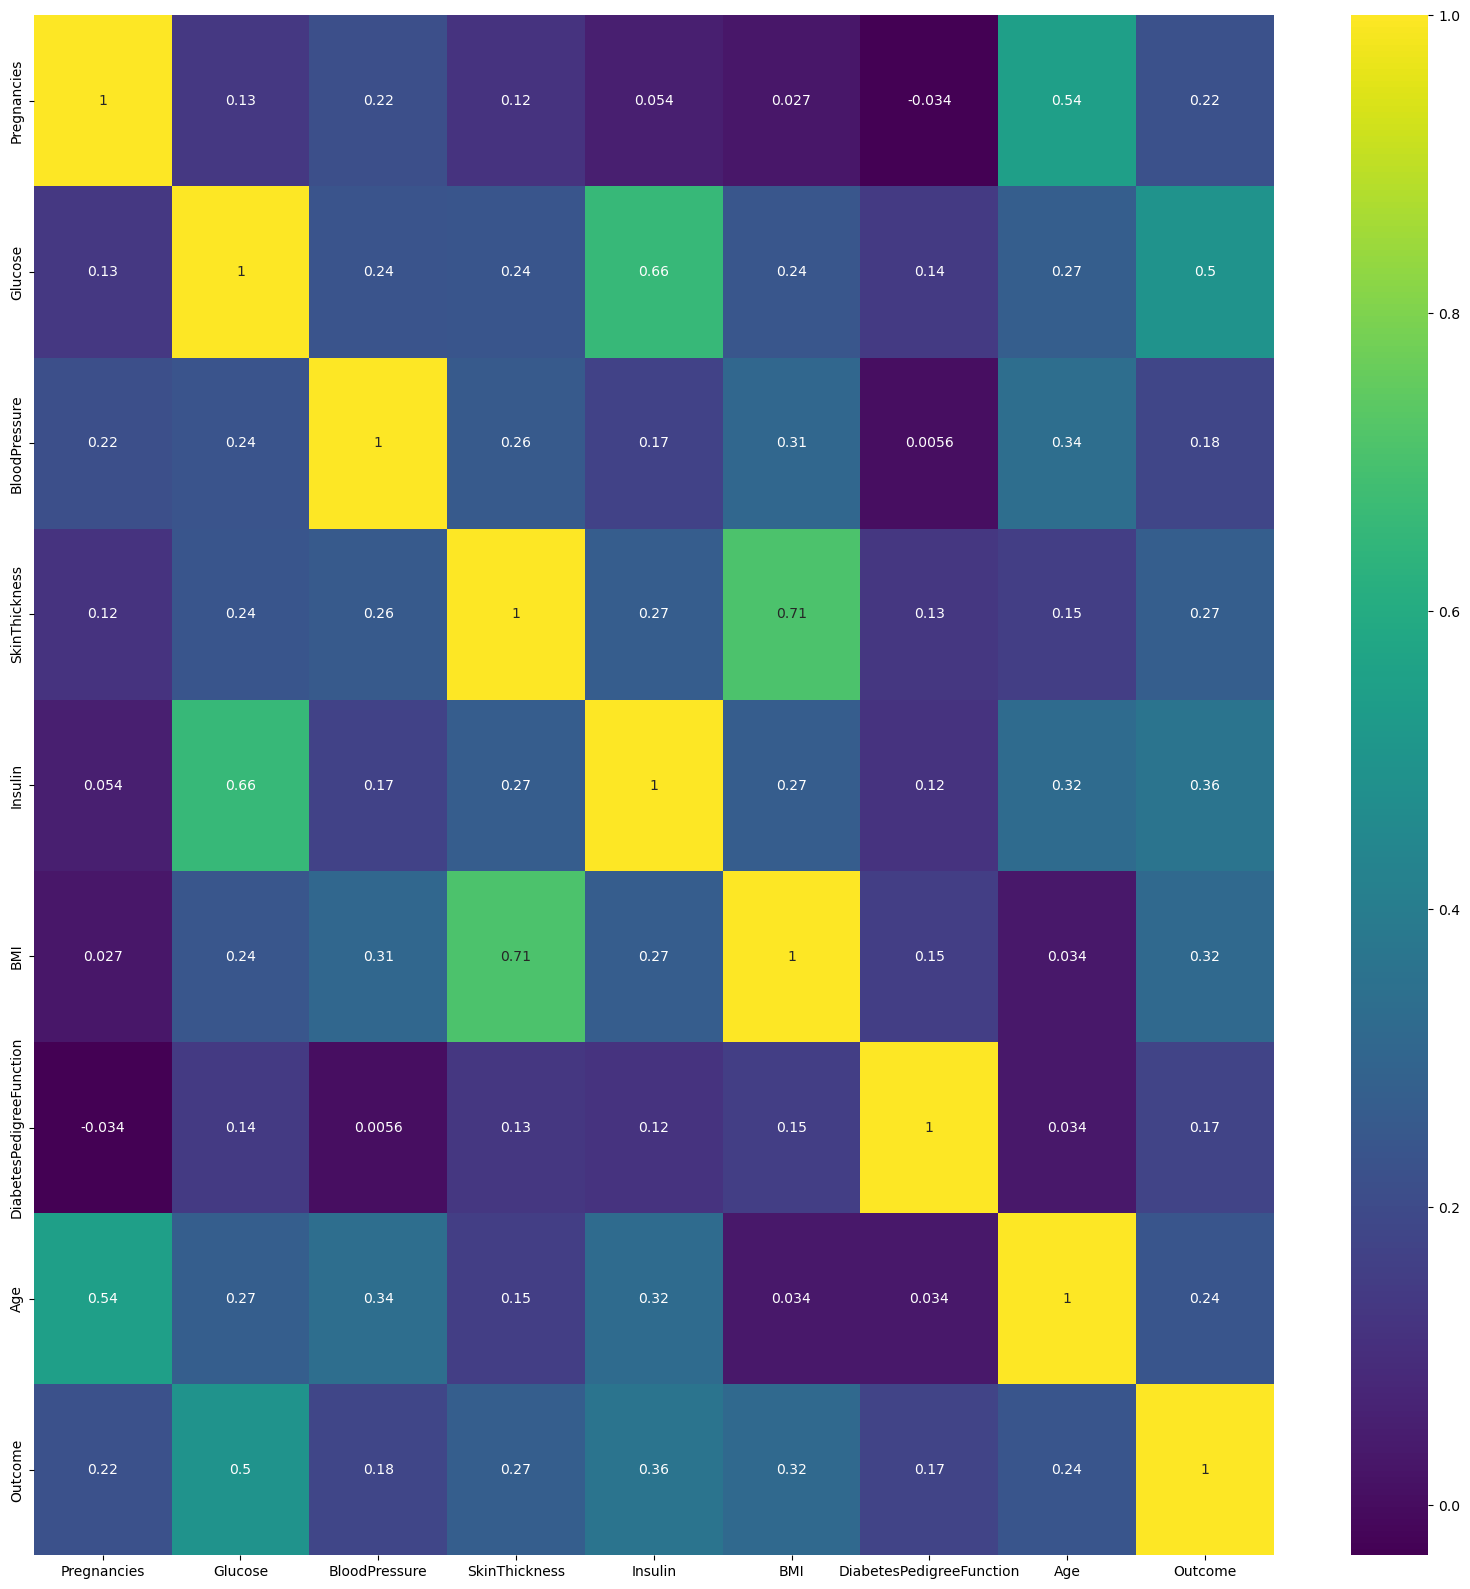

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

In [27]:
X,y=df_imp.iloc[:,:-1].values, df_imp.iloc[:,-1].values

In [29]:
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resampled_smote,y_resampled_smote,random_state=0)

In [30]:
lr2=LogisticRegression(C=100,max_iter=400)
svc=SVC()
rf=RandomForestClassifier(min_samples_leaf=1)
xgb=XGBClassifier(eta=0.1)

for model in [lr2,svc,rf,xgb]:
    model.fit(X_train_smote,y_train_smote)
    scores=cross_val_score(model,X_resampled_smote,y_resampled_smote)
    score=np.mean(scores)
    score2=lr2.score(X_test_smote,y_test_smote)
    cr=classification_report(y_test_smote,model.predict(X_test_smote))
    print('{}:\ncross_validation_score:{} \ntest_score:{} \ntrain_score:{}\nclassification report:\n{}\n\n'
          .format(model.__class__.__name__,scores,score,score2,cr))


LogisticRegression:
cross_validation_score:[0.76  0.72  0.765 0.785 0.775] 
test_score:0.761 
train_score:0.776
classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       126
         1.0       0.78      0.76      0.77       124

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



SVC:
cross_validation_score:[0.715 0.735 0.75  0.75  0.76 ] 
test_score:0.742 
train_score:0.776
classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74       126
         1.0       0.73      0.81      0.77       124

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



RandomForestClassifier:
cross_validation_score:[0.785 0.745 0.79  0.88  0.85 ] 
test_sc

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)
eec=EasyEnsembleClassifier().fit(X_train,y_train)
cm=confusion_matrix(y_test,eec.predict(X_test))
cr=classification_report(y_test,eec.predict(X_test))
print('confusion_matrix:\n{}\nclassification_report:\n{}'.format(cm,cr) )

confusion_matrix:
[[79 33]
 [17 63]]
classification_report:
              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       112
         1.0       0.66      0.79      0.72        80

    accuracy                           0.74       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.75      0.74      0.74       192



In [33]:
lr4=LogisticRegression(max_iter=200)
svc2=SVC()
rf2=RandomForestClassifier(min_samples_leaf=1)
xgb2=XGBClassifier(eta=0.1)
knn=KNeighborsClassifier(n_neighbors=3)
for model in [lr4,svc2,rf2,xgb2,knn]:
    model.fit(X_train,y_train)
    cm=confusion_matrix(y_test,model.predict(X_test))
    cr=classification_report(y_test,model.predict(X_test))
    accuracy=accuracy_score(y_test,model.predict(X_test))
    print('{}:\naccuracy: {}\nconfusion_matrix:\n{}\nclassification_report:\n{}'.format(model.__class__.__name__,accuracy,cm,cr))

LogisticRegression:
accuracy: 0.71875
confusion_matrix:
[[97 15]
 [39 41]]
classification_report:
              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       112
         1.0       0.73      0.51      0.60        80

    accuracy                           0.72       192
   macro avg       0.72      0.69      0.69       192
weighted avg       0.72      0.72      0.71       192

SVC:
accuracy: 0.671875
confusion_matrix:
[[100  12]
 [ 51  29]]
classification_report:
              precision    recall  f1-score   support

         0.0       0.66      0.89      0.76       112
         1.0       0.71      0.36      0.48        80

    accuracy                           0.67       192
   macro avg       0.68      0.63      0.62       192
weighted avg       0.68      0.67      0.64       192

RandomForestClassifier:
accuracy: 0.7239583333333334
confusion_matrix:
[[94 18]
 [35 45]]
classification_report:
              precision    recall  f1-score   s

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,lr4.decision_function(X_test))
fpr2,tpr2,thresholds2=roc_curve(y_test,svc.decision_function(X_test))
fpr3,tpr3,thresholds3=roc_curve(y_test,rf2.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds4=roc_curve(y_test,xgb2.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds5=roc_curve(y_test,knn.predict_proba(X_test)[:,1])

In [35]:
close_zero=np.argmin(np.abs(thresholds))
close_zero2=np.argmin(np.abs(thresholds2))
close_zero3=np.argmin(np.abs(thresholds3))
close_zero4=np.argmin(np.abs(thresholds4))
close_zero5=np.argmin(np.abs(thresholds5))

Text(0, 0.5, 'Recall')

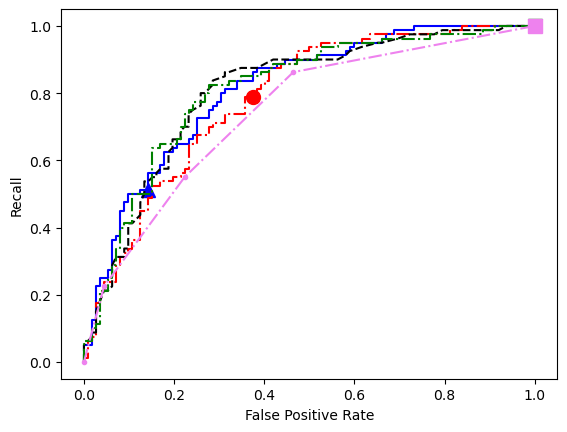

In [36]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr[close_zero],tpr[close_zero],marker='^',markersize=10,color='b')
plt.plot(fpr2,tpr2,'-.',color='r')
plt.plot(fpr2[close_zero2],tpr2[close_zero2],marker='o',markersize=10,color='r')
plt.plot(fpr3,tpr3,'--',color='black')
plt.plot(fpr3[close_zero3],tpr3[close_zero3],marker='*',markersize=10,color='black')
plt.plot(fpr4,tpr4,'-.',color='g')
plt.plot(fpr4[close_zero4],tpr4[close_zero4],marker='v',markersize=10,color='g')
plt.plot(fpr5,tpr5,'-..',color='violet')
plt.plot(fpr5[close_zero5],tpr5[close_zero5],marker='s',markersize=10,color='violet')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

In [37]:
a=np.argwhere(tpr4==1)

In [38]:
thresholds4[a]

array([[0.00266265],
       [0.00084158]], dtype=float32)

Desired higher recall for class 1 so as to reduce the number of false negatives involved in predicting diabetes.
Above result shows that the decision_function should be thresholded at -2.1 so as to achieve a recall of 0.95.

In [39]:
auc_score=roc_auc_score(y_test,lr4.decision_function(X_test))
auc_score_svm=roc_auc_score(y_test,svc2.decision_function(X_test))
auc_score_rf=roc_auc_score(y_test,rf2.predict_proba(X_test)[:,1])
auc_score_xgb=roc_auc_score(y_test,xgb2.predict_proba(X_test)[:,1])
auc_score_knn=roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print('auc_score of LR: {}\nauc_score of SVM: {}\nauc_score of RF: {}\nauc_score of XGB: {}\nauc_score of KNN: {}'.
      format(auc_score,auc_score_svm,auc_score_rf,auc_score_xgb,auc_score_knn))

auc_score of LR: 0.8113839285714286
auc_score of SVM: 0.7603794642857143
auc_score of RF: 0.8076450892857143
auc_score of XGB: 0.8109375
auc_score of KNN: 0.743359375
